In [1]:
from skimage import io
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np
import cv2

In [2]:
image = io.imread('data/india.jpg', as_gray=True)

In [4]:
image.shape, image.dtype
M, N = image.shape
M, N

(317, 239)

Text(0.5, 1.0, 'Original Noisy Image')

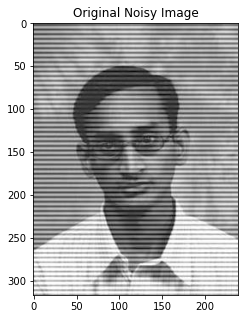

In [4]:
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image, cmap="gray")
ax.set_title('Original Noisy Image')

In [5]:
F = fftpack.fft2(image)
F_magnitude = np.abs(F)

In [6]:
def plot_spectrum(F):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(F), norm=LogNorm(vmin=5))
    plt.colorbar()

Text(0.5, 1.0, 'Fourier Transform')

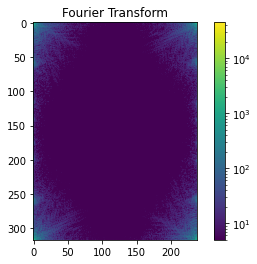

In [7]:
plt.figure()
plot_spectrum(F)
plt.title('Fourier Transform')

In [8]:
Fs = fftpack.fftshift(F)

Text(0.5, 1.0, 'Shift Transformation Result')

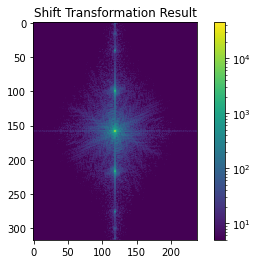

In [9]:
plt.figure()
plot_spectrum(Fs)
plt.title('Shift Transformation Result')

In [15]:
for j in range(115, 126):
    for i in range(12, 22):
        Fs[i,j] = 0
    for i in range(37, 47):
        Fs[i,j] = 0
    for i in range(96, 106):
        Fs[i,j] = 0
    for i in range(216, 226):
        Fs[i,j] = 0
    for i in range(274, 284):
        Fs[i,j] = 0
    for i in range(298, 308):
        Fs[i,j] = 0

C:\Users\ACER\AppData\Local\Temp/ipykernel_252/3677569998.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(Fs)), cmap="gray")


Text(0.5, 1.0, 'Modified Fourier Transform')

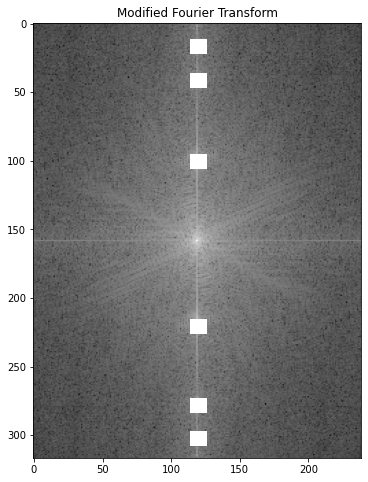

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(np.log(abs(Fs)), cmap="gray")
plt.title("Modified Fourier Transform")

In [17]:
Fus = fftpack.ifftshift(Fs)
im_new = fftpack.ifft2(Fus).real

Text(0.5, 1.0, 'Reconstructed Image')

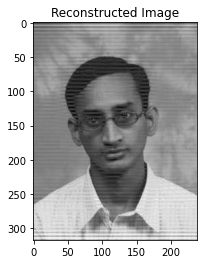

In [18]:
plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title("Reconstructed Image")